# Métodos III - Conceptos


**Course: "Métodos III - Derivadas en varias dimensiones"**

*Author: Jose A. Hernando*, February 2018

*Particle Physics Deparment. Universidade de Santiago de Compostela, Spain.*

### Import modules and matplotlib

In [2]:
# general imports
%matplotlib inline

# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

from mpl_toolkits.mplot3d import Axes3D
# possible styles: ggplot (simplicity), bmh (scientify data), 
matplotlib.style.use('ggplot')

# ploting images
from IPython.display import display, Image

---

### define some common functions to plot surfaces and coutours

In [3]:
def contour(fun, x0=10., bins=40, ncon=10, title=''):
    
    fig, ax = plt.subplots(figsize=(6, 5))
    
    xs = np.linspace(-x0, x0, bins)
    ys = np.linspace(-x0, x0, bins)
    
    xms, yms = np.meshgrid(xs, ys)
    zms = np.zeros(bins*bins).reshape(bins, bins)
    for i in range(bins):
        for j in range(bins):
            zms[j, i] = fun(xs[i], ys[j])
    
    c0 = ax.contourf(xms, yms, zms, ncon, alpha=0.8, cmp=plt.cm.jet)
    c1 = ax.contour(xms, yms, zms, ncon, colors='black', alpha=0.5, lw=0.05);
    c1.clabel(fontsize=10, inline=1)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_title(title)
    fig.colorbar(c0, ax=ax)
    fig.tight_layout()
    
    return fig, ax

def grafica(fun, x0=10., bins=40, offset=0, title=''):
    
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    xs = np.linspace(-x0, x0, bins)
    ys = np.linspace(-x0, x0, bins)

    xms, yms = np.meshgrid(xs, ys)
    zms = np.zeros(bins*bins).reshape(bins, bins)
    for i in range(bins):
        for j in range(bins):
            zms[j, i] = fun(xs[i], ys[j])
    
    cmap = plt.cm.jet
    sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
    ct = ax.contour(xms, yms, zms, zdir='z', offset=offset, alpha=0.4, cmap=cmap)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xlim([np.min(xs), np.max(xs)])
    ax.set_ylim([np.min(ys), np.max(ys)])
    ax.set_title(title)
    fig.colorbar(sf, ax=ax)
    fig.tight_layout()
    
    return fig, ax


## Graficas

**Ejemplo:** Gráfica de la función $f(x)= \sin(x)/x$

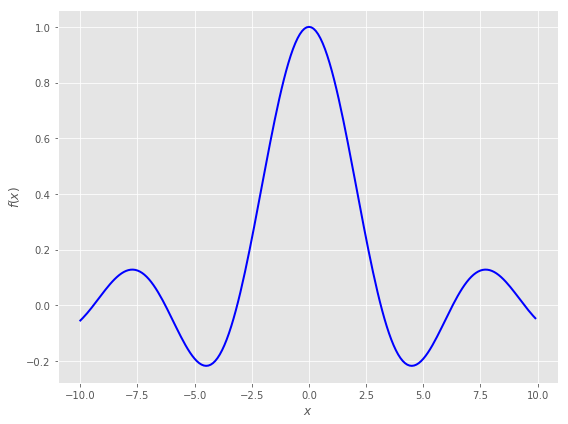

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.arange(-10., 10., 0.1)
ys = np.sin(xs)/xs
ax.plot(xs, ys, color='blue', lw=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
fig.tight_layout();

**Exemplo:** Gráfica de la función escalar: $f(x, y) = \sin\left(\sqrt{x^2+y^2}\right)/\sqrt{x^2+y^2}$

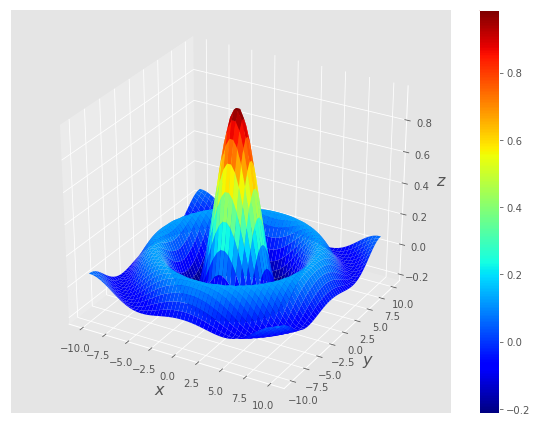

In [5]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
rms = np.sqrt(xms*xms+yms*yms)
zms = np.sin(rms)/rms

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
fig.colorbar(sf, ax=ax);

fig.tight_layout();

## Conjuntos de nivel

**Ejemplo:** Gráfica y conjuntos de nivel de la función: $f(x, y) = x^2+y^2$

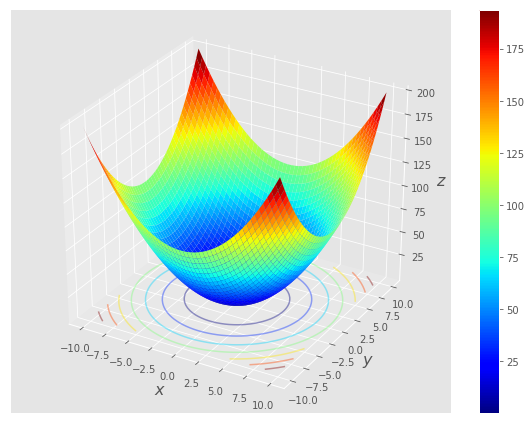

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = xms*xms+yms*yms

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ct = ax.contour(xms, yms, zms, zdir='z', offset=0., alpha=0.4, cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
fig.colorbar(sf, ax=ax);

fig.tight_layout();

**Ejemplo:** Gráfica y conjunto de nivel de la función: $f(x, y) = -x^2-y^2$

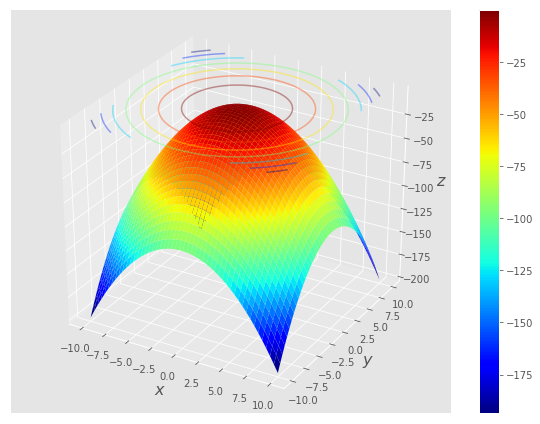

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = -xms*xms-yms*yms

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ct = ax.contour(xms, yms, zms, zdir='z', offset=1.2, alpha=0.4, cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
fig.colorbar(sf, ax=ax);

fig.tight_layout();

**Ejemplo:** Gráfica de la función: $f(x, y) = x^2-y^2$

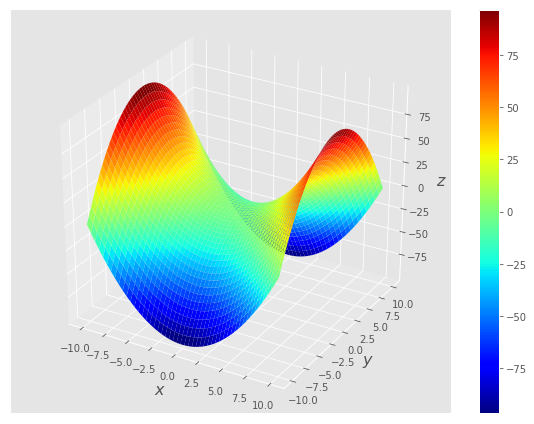

In [8]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = xms*xms-yms*yms

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
fig.colorbar(sf, ax=ax);

fig.tight_layout();

---

## Derivadas

In [9]:
def plot_axis(ax):
    ax.spines['bottom'].set_color('black')
    ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_position(('data',0))
    return 

**Ejemplo:** Parametrización de una recta que pasa por un punto $(x_0, y_0)$ con pendiente en $y$, $m$.

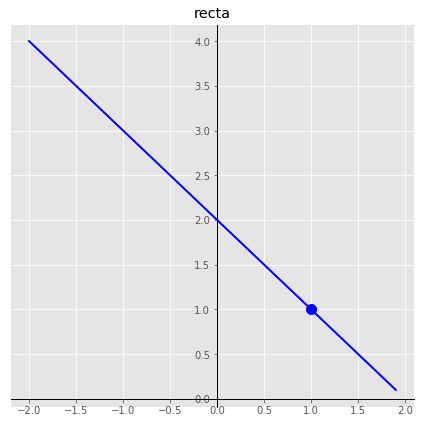

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

xs = np.arange(-2., 2., 0.1)
x0, y0 = 1., 1.
m = -1.
ys = m*(xs-x0)+y0
ax.plot(xs, ys, color='blue', lw=2)
ax.plot(x0, y0, color='blue', marker='o', markersize=10)
plot_axis(ax)
ax.set_title('recta')
fig.tight_layout();

**Ejemplo:** Gráfica y curvas de nivel de la función $f(x, y) = \sqrt{x^2+y^2}$ y la recta $y=2 x$.

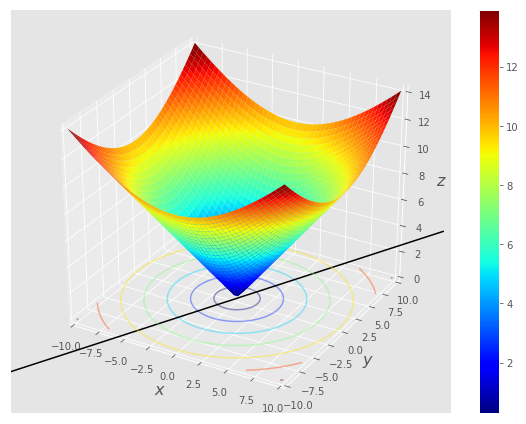

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = np.sqrt(xms*xms+yms*yms)

cmap = plt.cm.jet
# ax.view_init(0., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ct = ax.contour(xms, yms, zms, zdir='z', offset=0., alpha=0.4, cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
fig.colorbar(sf, ax=ax);

m = 2.
cys = m*xs

ax.plot(xs, cys, color='black')

fig.tight_layout();

**Ejemplo:** Gráfica de la función $f(x, y) = \frac{x*y}{x^2+y^2}$ y trayectorias que pasan por el origen en dominio.

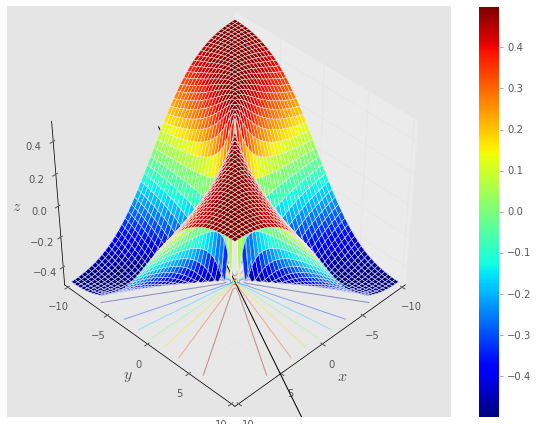

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')

xs = np.linspace(-10., 10., 50)
ys = np.linspace(-10., 10., 50)

xms, yms = np.meshgrid(xs, ys)
zms = xms*yms/(xms*xms+yms*yms)

cmap = plt.cm.jet
ax.view_init(45., 45.)
sf = ax.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ct = ax.contour(xms, yms, zms, zdir='z', offset=-0.5, alpha=0.4, cmap=cmap)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_zlabel('$z$', fontsize=16)
ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
fig.colorbar(sf, ax=ax);

m = 2.
cys = m*xs

ax.plot(xs, cys, -0.5, color='black')

fig.tight_layout();

----

## Parametrización de trayectorias

**Ejemplo:** Traza que deja una rueda al girar sobre una superficie plana.

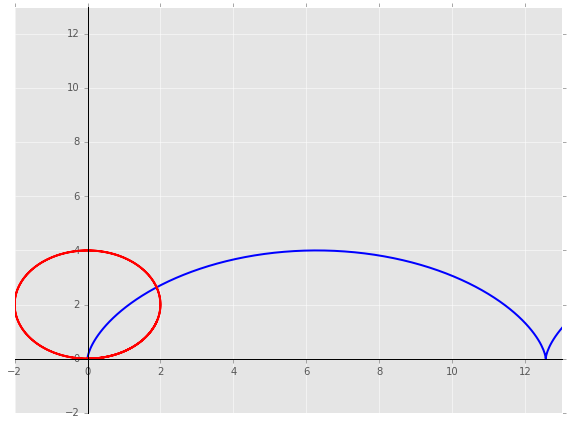

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))

v, r = 1.1, 2.
ts = np.linspace(0., 4*np.pi*r, 200)
xs = v*ts - r* np.sin(v*ts/r)
ys = r*(1-np.cos(v*ts/r))
ax.plot(xs, ys, color='blue', lw=2)
xxs = r*np.sin(v*ts/r)
ax.plot(xxs, ys, color='red', lw=2)
ax.set_ylim((-2., 13.))
ax.set_xlim((-2., 13.))
plot_axis(ax)
fig.tight_layout();

**Ejemplo:** Parametrización de un circunferencia centrada en $(1, 0)$ y radio 1.

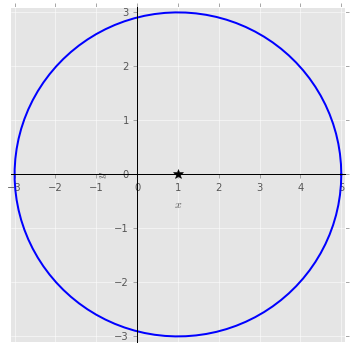

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))
x0, y0 = 1., 0.
a, b = 4, 3.
r = 1.
phis = np.linspace(0., 2.*np.pi, 100)
xs = x0+a*np.cos(phis)
ys = y0+b*np.sin(phis)
ax.plot(xs, ys, color='blue', lw=2)
ax.plot(x0, y0, marker='*', markersize=10, color='black')
plot_axis(ax)
ax.set_ylim([np.min(ys)-0.1, np.max(ys)+0.1])
ax.set_xlim([np.min(xs)-0.1, np.max(xs)+0.1])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

**Ejemplo:** Parametrización de una circunferencia centrada en $(1, 0)$ de radio 1.

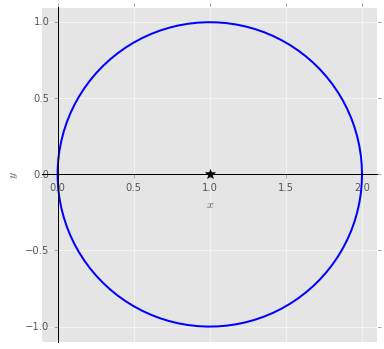

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
x0, y0 = 1., 0.
r = 1.
phis = np.linspace(0., 2.*np.pi, 100)
xs = x0+r*np.cos(phis)
ys = y0+r*np.sin(phis)
ax.plot(xs, ys, color='blue', lw=2)
ax.set_xlim([np.min(xs)-0.1, np.max(xs)+0.1])
ax.set_ylim([np.min(ys)-0.1, np.max(ys)+0.1])
ax.plot(x0, y0, marker='*', markersize=10, color='black')
plot_axis(ax)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

**Ejemplo:** Parametrización de una hélice que se desplaza en el eje $z$

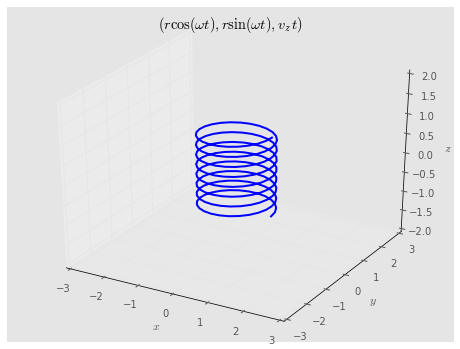

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ts = np.linspace(-2., 2., 200)
vz, r = 0.5, 1.
omega = 2*2*np.pi
zs = vz*ts
xs = r*np.cos(omega*ts)
ys = r*np.sin(omega*ts)
ax.plot(xs, ys, zs, lw=2, color='blue')
ax.set_xlim([-3., 3.])
ax.set_ylim([-3., 3.])
ax.set_zlim([-2., 2.])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$');
ax.set_title(r'$(r \cos( \omega t), r \sin(\omega t), v_z \, t)$');

**Ejemplo:** Parametrización de un recta en el espacio

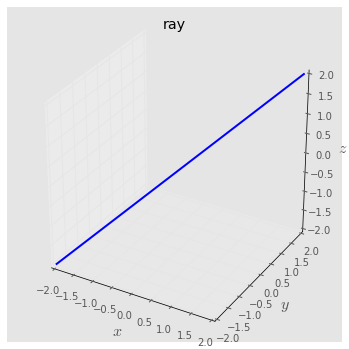

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ts = np.linspace(-2., 2., 200)
x0, y0, z0 = 0., 0., 0.
vx, vy, vz = 1., 1., 1.
xs = x0+vx*ts
ys = y0+vy*ts
zs = z0+vz*ts
ax.plot(xs, ys, zs, lw=2, color='blue')
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
ax.set_zlabel(r'$z$', fontsize=16);
ax.set_title('ray');

----

## Derivadas direccionales

**Ejemplo:** Gráfica de la función $f(x, y)= a x + b y + c$, y las derivadas direccionales en la direcciones $(1, 0), (0, 1), (1, 1)$

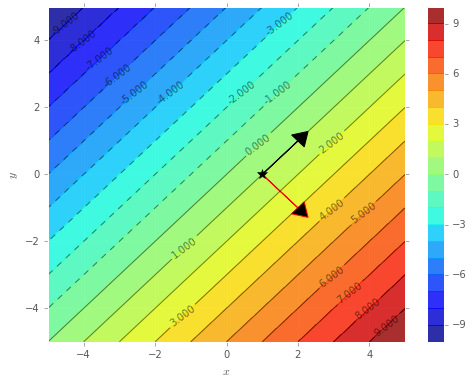

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-5., 5., 40)
ys = np.linspace(-5., 5., 40)

xms, yms = np.meshgrid(xs, ys)
a, b, c = 1., -1., 0. 
zms = a*xms+b*yms+c

x0, y0 = 1., 0.
vx, vy = 1., 1.
gx, gy = 1., -1.

# color fill contour
c0 = ax.contourf(xms, yms, zms, 20, alpha=0.8, cmp=plt.cm.jet)
ax.plot(x0, y0, color='black', marker='*', markersize=10)
ax.arrow(x0, y0, vx, vy, head_width=0.5, head_length=0.4, fc='k', 
         color='black', lw=1)
ax.arrow(x0, y0, gx, gy, head_width=0.5, head_length=0.4, fc='k', 
         color='red', lw=1)
# lines contour
c1 = ax.contour(xms, yms, zms, 20, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

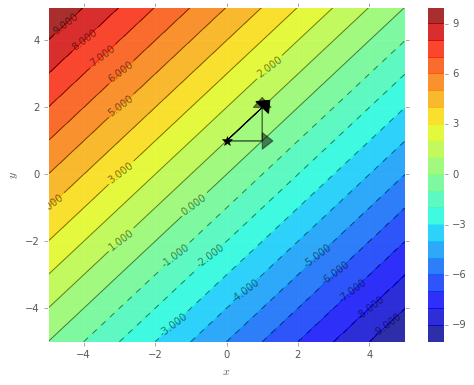

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-5., 5., 40)
ys = np.linspace(-5., 5., 40)

xms, yms = np.meshgrid(xs, ys)
a, b, c = -1., 1., 0. 
zms = a*xms+b*yms+c

x0, y0 = 0., 1.
vx, vy = 1., 1.

# color fill contour
c0 = ax.contourf(xms, yms, zms, 20, alpha=0.8, cmp=plt.cm.jet)
ax.plot(x0, y0, color='black', marker='*', markersize=10)
ax.arrow(x0, y0, vx, vy, head_width=0.5, head_length=0.3, fc='k', 
         color='black', lw=1)
ax.arrow(x0, y0, vx, 0, head_width=0.5, head_length=0.3, fc='k', 
         color='black', lw=1, alpha=0.5)
ax.arrow(x0+vx, y0, 0, vy, head_width=0.5, head_length=0.3, fc='k', 
         color='black', lw=1, alpha=0.5)
# lines contour
# ax.plot((0., 0.), (10*vx, 10*vy), color='black')
c1 = ax.contour(xms, yms, zms, 20, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

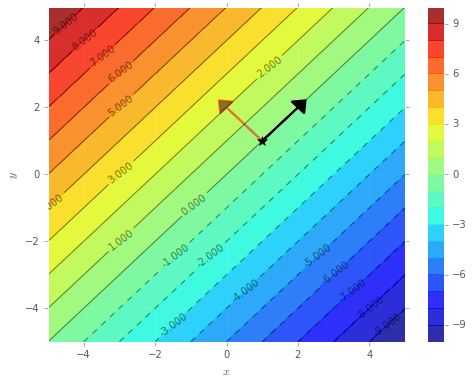

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-5., 5., 40)
ys = np.linspace(-5., 5., 40)

xms, yms = np.meshgrid(xs, ys)
a, b, c = -1., 1., 0. 
zms = a*xms+b*yms+c

x0, y0 = 1., 1.
vx, vy = 1., 1.

# color fill contour
c0 = ax.contourf(xms, yms, zms, 20, alpha=0.8, cmp=plt.cm.jet)
ax.plot(x0, y0, color='black', marker='*', markersize=10)
ax.arrow(x0, y0, vx, vy, head_width=0.5, head_length=0.3, fc='k', 
         color='black', lw=2)
ax.arrow(x0, y0, a, b, head_width=0.5, head_length=0.3, fc='k', 
         color='red', lw=2, alpha=0.5)
# lines contour
# ax.plot((0., 0.), (10*vx, 10*vy), color='black')
c1 = ax.contour(xms, yms, zms, 20, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

**Ejemplo:** Gráfica de la función $f(x, y) = \sqrt{x^2+y^2}$ y las derivadas direccionales.

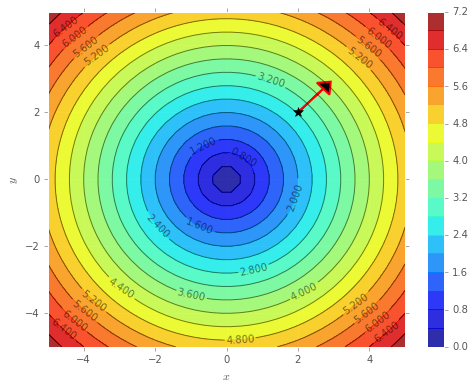

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-5., 5., 40)
ys = np.linspace(-5., 5., 40)

xms, yms = np.meshgrid(xs, ys)
zms = np.sqrt(xms*xms+yms*yms)
# zgrad = (-xms/(rms*rms*rms), -ys/(rms*rms*rms))
# zms = 1./

x0, y0 = 2., 2.
r0 = np.sqrt(x0*x0+y0*y0)
# color fill contour
c0 = ax.contourf(xms, yms, zms, 20, alpha=0.8, cmp=plt.cm.jet)
ax.plot(x0, y0, color='black', marker='*', markersize=10)
vx, vy = x0/r0, y0/r0
ax.arrow(x0, y0, vx, vy, head_width=0.5, head_length=0.3, fc='k', 
         color='red', lw=2)
#ax.arrow(x0, y0, a, b, head_width=0.5, head_length=0.3, fc='k', 
#         color='red', lw=2, alpha=0.5)
# lines contour
# ax.plot((0., 0.), (10*vx, 10*vy), color='black')
c1 = ax.contour(xms, yms, zms, 20, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

**Ejemplo:** Gráfica del potencial escalar y del gradiente.

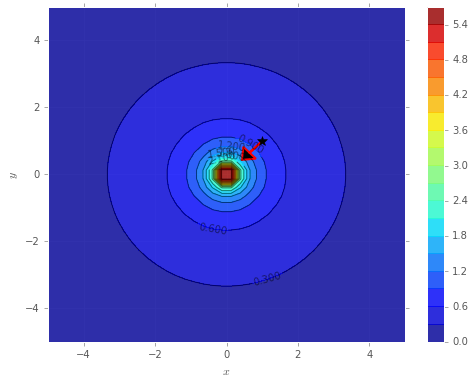

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-5., 5., 40)
ys = np.linspace(-5., 5., 40)

xms, yms = np.meshgrid(xs, ys)
zms = 1./np.sqrt(xms*xms+yms*yms)
# zgrad = (-xms/(rms*rms*rms), -ys/(rms*rms*rms))
# zms = 1./

x0, y0 = 1., 1.
r0 = np.sqrt(x0*x0+y0*y0)
vx, vy = -x0/(r0**3), -y0/(r0**3)

# color fill contour
c0 = ax.contourf(xms, yms, zms, 20, alpha=0.8, cmp=plt.cm.jet)
ax.plot(x0, y0, color='black', marker='*', markersize=10)
ax.arrow(x0, y0, vx, vy, head_width=0.5, head_length=0.3, fc='k', 
         color='red', lw=2)
#ax.arrow(x0, y0, a, b, head_width=0.5, head_length=0.3, fc='k', 
#         color='red', lw=2, alpha=0.5)
# lines contour
# ax.plot((0., 0.), (10*vx, 10*vy), color='black')
c1 = ax.contour(xms, yms, zms, 20, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

**Ejemplo:** Gráfica del potencial escalar un dipolo eléctrico y el gradiente.

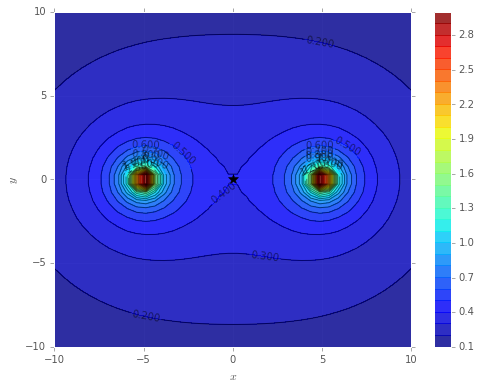

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

bins = 40
xs = np.linspace(-10., 10., bins)
ys = np.linspace(-10., 10., bins)

xms, yms = np.meshgrid(xs, ys)
# zms = 1./np.sqrt(xms*xms+yms*yms)

x0 = np.array([0, 0.])
xa = np.array([-5., 0.])
xb = np.array([ 5., 0.])

def distance(x1, x2):
    dx =(x1-x2)
    return np.sqrt(np.sum(dx*dx))

def vpotential(x, xa, xb, vmax=100.):
    d1 = distance(x, xa)
    d2 = distance(x, xb)
    vv = 1./d1 + 1./d2
    vv = min(vv, vmax)
    return vv

zms = np.zeros(bins*bins).reshape(bins, bins)
for i in range(len(xs)):
    for j in range(len(ys)):
        xx = np.array([xs[i], ys[j]])
        zms[j, i] = vpotential(xx, xa, xb, vmax=3.)
        
# color fill contour
c0 = ax.contourf(xms, yms, zms, 30, alpha=0.8, cmp=plt.cm.jet)
ax.plot(x0[0], x0[1], color='black', marker='*', markersize=10)
# ax.arrow(x0, y0, vx, vy, head_width=0.5, head_length=0.3, fc='k', 
#         color='red', lw=2)
#ax.arrow(x0, y0, a, b, head_width=0.5, head_length=0.3, fc='k', 
#         color='red', lw=2, alpha=0.5)
# lines contour
# ax.plot((0., 0.), (10*vx, 10*vy), color='black')
c1 = ax.contour(xms, yms, zms, 30, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

----

### Mínimos y máximos

**Ejemplo:** Conjuntos de nivel de las funciones: $f(x, y) = 2x^2+4y^2$ y $f(x, y)=3x^2+2y^2-2x*y$.

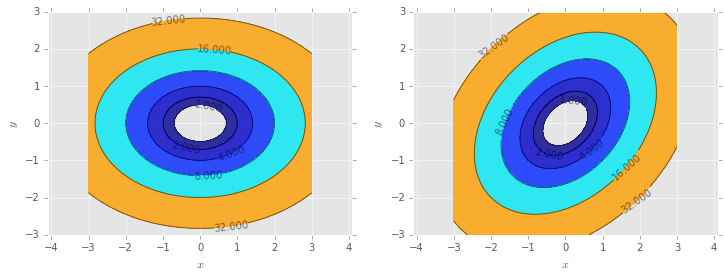

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax0, ax1 = axs[0], axs[1]
xs = np.linspace(-3., 3., 40)
ys = np.linspace(-3., 3., 40)
levels = (1., 2., 4., 8., 16., 32.)

xms, yms = np.meshgrid(xs, ys)
zms = 2*xms*xms+4*yms*yms

ax0.axis('equal')
c0 = ax0.contourf(xms, yms, zms, levels, alpha=0.8, cmp=plt.cm.jet)
c1 = ax0.contour(xms, yms, zms, levels, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

zms = 3*xms*xms+3*yms*yms-2*xms*yms
ax1.axis('equal')
c0 = ax1.contourf(xms, yms, zms, levels, alpha=0.8, cmp=plt.cm.jet)
c1 = ax1.contour(xms, yms, zms, levels, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

**Ejemplo:** Conjuntos de nivel de la función: $f(x, y) = 3x^2 + 2y^2-2xy$

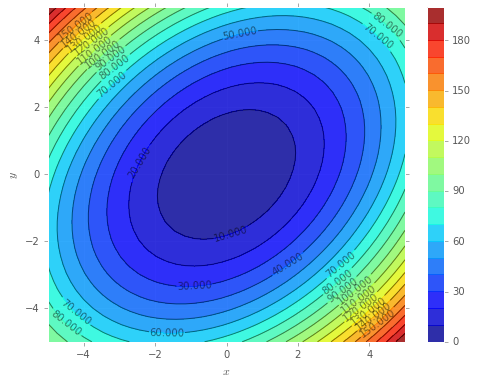

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-5., 5., 40)
ys = np.linspace(-5., 5., 40)

xms, yms = np.meshgrid(xs, ys)
zms = 3*xms*xms+3*yms*yms-2*xms*yms

c0 = ax.contourf(xms, yms, zms, 20, alpha=0.8, cmp=plt.cm.jet)
c1 = ax.contour(xms, yms, zms, 20, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

**Ejemplo**: Las gráficas de las funciones $f(x, y) = 2x^2+4y^2$ y $f(x, y)=3x^2+2y^2-2x*y$.

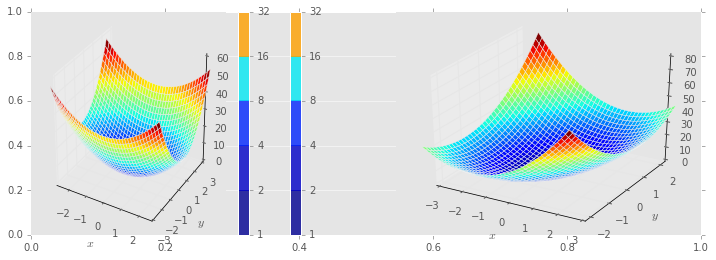

In [24]:
fig, axs = plt.subplots(figsize=(12, 4))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

xs = np.linspace(-3., 3., 40)
ys = np.linspace(-3., 3., 40)
levels = (1., 2., 4., 8., 16., 32.)

xms, yms = np.meshgrid(xs, ys)

cmap = plt.cm.jet
zms = 2*xms*xms+4*yms*yms
ax0.axis('equal')
sf = ax0.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax0);

zms = 3*xms*xms+3*yms*yms-2*xms*yms
ax1.axis('equal')
sf = ax1.plot_surface(xms, yms, zms, rstride=1, cstride=1, alpha=1., cmap=cmap)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax0);

----

## Máximos y mínimos condicionados

**Ejemplo:** Máximos y mínimos a lo largo de una circunferencia de radio unidad de la función $f(x, y) = x^2-y^2$

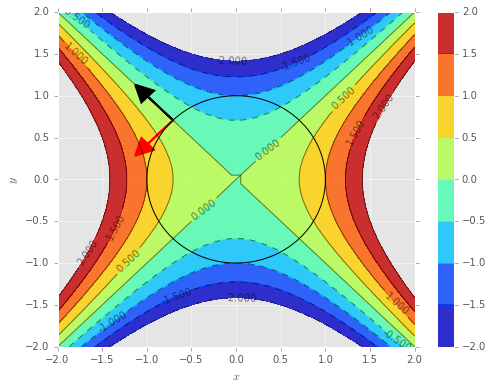

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(-2., 2., 40)
ys = np.linspace(-2., 2., 40)

xms, yms = np.meshgrid(xs, ys)
zms = xms*xms-yms*yms

phis = np.linspace(0., 2.*np.pi, 100)

ax.plot(np.cos(phis), np.sin(phis), color='black', lw=1.)

levels = (-2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5, 2.)

c0 = ax.contourf(xms, yms, zms, levels, alpha=0.8, cmp=plt.cm.jet)
c1 = ax.contour(xms, yms, zms, levels, colors='black', alpha=0.5, lw=0.05);
c1.clabel(fontsize=10, inline=1)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(c0, ax=ax);

phi=3.*np.pi/4.
x0, y0 = np.cos(phi), np.sin(phi)
gx, gy = 2*x0, 2*y0
fx, fy = 2*x0, -2*y0
ax.arrow(x0, y0, 0.2*gx, 0.2*gy, head_width=0.2, head_length=0.2,
         fc='k', color='black', lw=2)
ax.arrow(x0, y0, 0.2*fx, 0.2*fy, head_width=0.2, head_length=0.2,
         fc='red', color='red', lw=2)